In [1]:
from coreLib.dataset import DataSet
data_dir       = "/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata"
ds=DataSet(data_dir)
ds.common.symbols.df

#LOG     :All paths found


  0%|          | 0/200840 [00:00<?, ?it/s]

  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/bangla/dictionary.csv


  0%|          | 0/1059977 [00:00<?, ?it/s]

  0%|          | 0/46101 [00:00<?, ?it/s]

  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :converting int labels to string


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/english/dictionary.csv


  0%|          | 0/370098 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

,filename,label,img_path
0,symbol_0,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
1,symbol_1,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
2,symbol_2,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
3,symbol_3,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
4,symbol_4,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
...,...,...,...
5970,symbol_5970,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5971,symbol_5971,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5972,symbol_5972,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5973,symbol_5973,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...


In [80]:
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import cv2
import numpy as np
import sys
import numpy
import scipy.ndimage as sni
from pprint import pprint


# from coreLib.dataset import DataSet
from __notes__.memo_utils import drawsPrintTextOnTable


## Create Table and place text on image

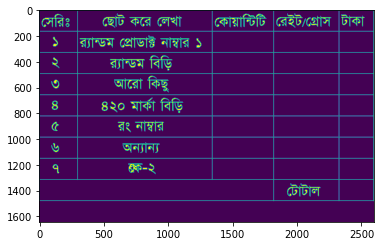

In [81]:
class_map_csv='/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synthdata/__notes__/class_map.csv'
font_path='/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synthdata/__notes__/Bangla.ttf'

printTextData = {'serial': ["সেরিঃ",  
                            "১",
                            "২",
                            "৩", 
                            "৪", 
                            "৫",
                            "৬",
                            "৭"],
                 'brand': ["ছোট করে লেখা", 
                            "র‍্যান্ডম প্রোডাক্ট নাম্বার ১",
                            "র‍্যান্ডম বিড়ি",
                            "আরো কিছু",
                            "৪২০ মার্কা বিড়ি",
                            "রং নাম্বার",
                            "অন্যান্য",
                            "কে-২"],
                 'quantity': ["কোয়ান্টিটি"],
                 'rate': ["রেইট/গ্রোস"], 
                 'taka': ["টাকা"]
                 
              }

total = ["টোটাল"]


Table_Image_with_Text, all_locs, labeled_img = drawsPrintTextOnTable(printTextData, total, class_map_csv, font_path)

TableImg = Table_Image_with_Text
TableImg[TableImg>0]=255
plt.imshow(TableImg)
plt.show()

In [82]:
all_locs

[1, 6, 11, 16, 21, 26, 31, 36, 2, 7, 12, 17, 22, 27, 32, 37, 3, 4, 5, 42]

In [83]:
all_locs[len(all_locs)-1]-1

41

In [84]:
others_locs = [i for i in range(1, all_locs[-1]+2) if i not in all_locs if i != all_locs[len(all_locs)-1]-1]
others_locs

[8,
 9,
 10,
 13,
 14,
 15,
 18,
 19,
 20,
 23,
 24,
 25,
 28,
 29,
 30,
 33,
 34,
 35,
 38,
 39,
 40,
 43]

In [85]:
num_cols = len(printTextData)
num_cols

5

In [99]:
# for loc in others_locs:
#     if loc % num_cols == 0:
#         print("Hello: ", loc)

# List_degree = [i for i in range(10,45+5,5)]
# print(List_degree)
# N_deg = random.choice(List_degree) # single item from the List
# print(N_deg)

[10, 15, 20, 25, 30, 35, 40, 45]
25


In [87]:
import random

List = [i for i in range(1,5)]
N = random.choice(List) # single item from the List
print(N)

# using the sample() method
Updated_others_locs = random.sample(others_locs, N)
  
# displaying random selections from 
# the list without repetition
print(Updated_others_locs)

3
[9, 38, 18]


In [88]:
others_locs__ = Updated_others_locs #[9, 15]
others_locs__

[9, 38, 18]

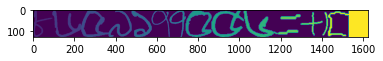

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
iden=2
from coreLib.word import create_word
img,label,iden=create_word(iden,
                            "bangla",
                            "handwritten",
                            "number",
                            ds,
                            use_dict=True)
# max neutralization
plt.imshow(img)
plt.show()

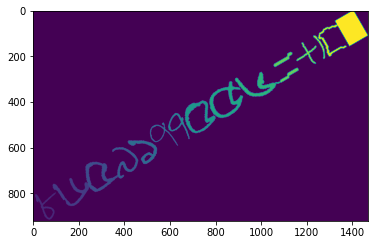

{2: '৮', 3: '৬', 4: '৫', 5: '৯', 6: '১', 7: '৭', 8: '৭', 9: '৫', 10: '৫', 11: '৬', 12: '.', 13: '=', 14: '+', 15: ')', 16: '[', 17: ' '}


In [90]:
def rotate_image(mat, angle):
    """
        Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h),flags=cv2.INTER_NEAREST)
    return rotated_mat,rotation_mat


rotated_img,M=rotate_image(img,30)
plt.imshow(rotated_img)
plt.show()
print(label)
#_img=cv2.resize(_img,(width,font_size)),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)

In [100]:
a=[bool(i) for i in np.array(np.random.randint(0,2,len(others_locs__)))]
a

[True, True, True]

In [101]:
rotated_check=[bool(i) for i in np.array(np.random.randint(0,2,len(others_locs__)))] # For TRUE
rot=0

imgs = []
for i in range(2, len(others_locs__)+2):
    img,label,iden=create_word(i,
                                "bangla",
                                "handwritten",
                                "number",
                                ds,
                                use_dict=True)
    
    
    if rotated_check[rot] == True:
        List_degree = [i for i in range(10,45+5,5)]
        N_deg = random.choice(List_degree) # single item from the List
        
        rotated_img,M=rotate_image(img,N_deg)
        
        imgs.append(rotated_img)
        
    else:
        imgs.append(img)
        
    rot += 1
        

In [102]:
len(others_locs__)

3

In [103]:
len(imgs)

3

In [104]:
np.unique(labeled_img)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int32)

In [105]:
from __notes__.memo_utils import padImg

# padImg(line_img,h_max,w_max)

160 503


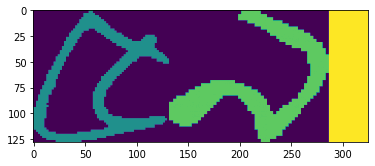

260 553


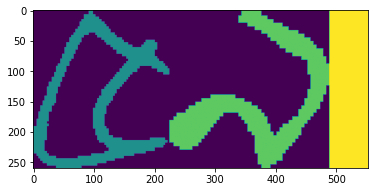

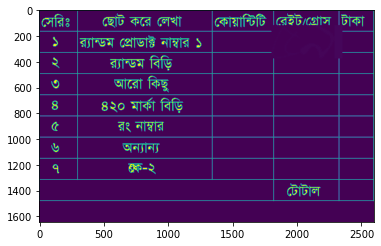

160 473


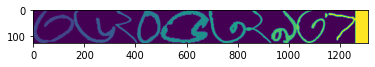

260 523


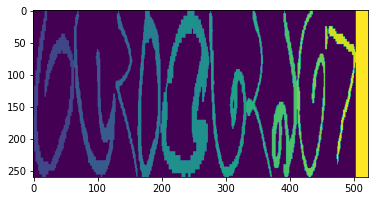

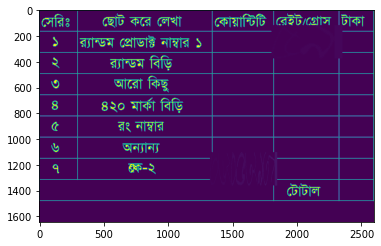

160 473


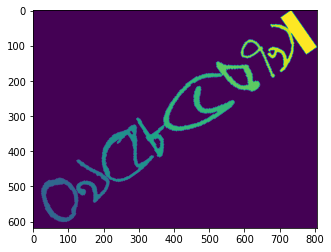

260 523


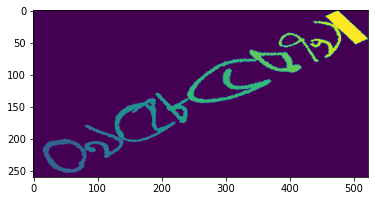

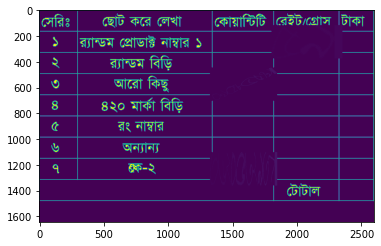

In [106]:
for i,img in zip(others_locs__,imgs):
    idx = np.where(labeled_img==i)
    y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
    
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
    print(h_max, w_max)
    
#     TableImg[y_min:y_max,x_min:x_max]=0
#     print(y_min,y_max,x_min,x_max)
    
    if i % num_cols == 0 or i == all_locs[len(all_locs)-1]-1:
        y_min,y_max,x_min,x_max = y_min-50,y_max+50,x_min,x_max
    else:
        y_min,y_max,x_min,x_max = y_min-50,y_max+50,x_min-20,x_max+30
    
#     print(y_min,y_max,x_min,x_max)
    TableImg[y_min:y_max,x_min:x_max]=0
    
#     print([y_min:y_max,x_min:x_max])
    
    plt.imshow(img)
    plt.show() 
#     print(img.shape)
    
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
    print(h_max, w_max)
    
#     img = padImg(img,h_max,w_max)
#     _img=cv2.resize(_img,(width,font_size)),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
#     _img=cv2.resize(img,(w_max,128),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
#     print(_img.shape)

    dim = (h_max, w_max)
    _img = cv2.resize(img, dim[::-1], fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    
    plt.imshow(_img)
    plt.show() 
#     print(_img.shape)
#     print(h_max, w_max)
    
    TableImg[y_min:y_max,x_min:x_max]=_img

    plt.imshow(TableImg)
    plt.show() 

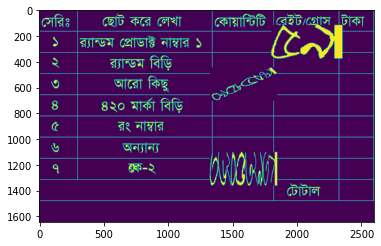

In [107]:
TableImg[TableImg>0]=255
plt.imshow(TableImg)
plt.show()